In [23]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 200

poly_opt [ -37.38254564 1509.65187602 -465.34469869] 1.44288107574971 4.98970316083688 3.5185674141569065


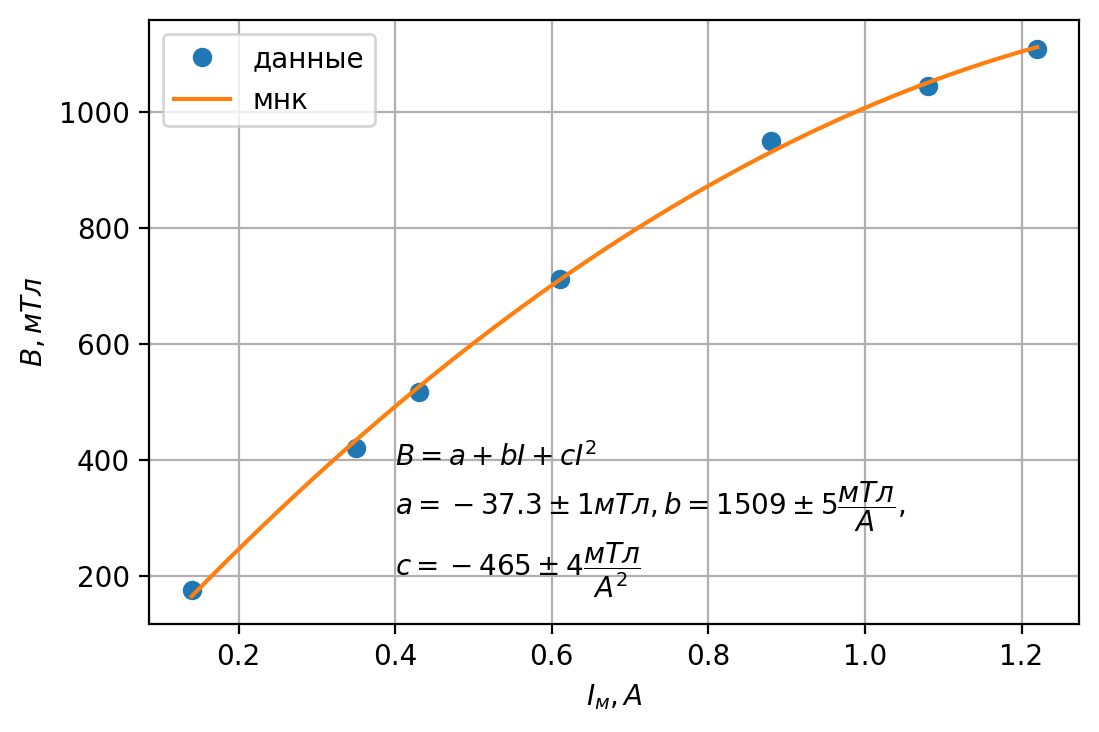

In [24]:
def line(x, a, b):
    return a * x + b

def poly(x, a, b, c):
    return a + b * x + c * x**2

B = np.array([175.7, 421, 517, 712, 949, 1045, 1108], dtype=np.float64)
I_em = np.array([0.14, 0.35, 0.43, 0.61, 0.88, 1.08, 1.22], dtype=np.float64)

plt.plot(I_em, B, 'o', label='данные')
plt.grid()
plt.xlabel(r'$I_{м}, А$')
plt.ylabel(r'$B, мТл$')

popt, pcov = curve_fit(poly, I_em, B, sigma=B/B, absolute_sigma=True)
plt.plot(np.linspace(I_em[0], I_em[-1]), poly(np.linspace(I_em[0], I_em[-1]), *popt), label='мнк')

print('poly_opt', popt, np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2]))
K = popt[0]

plt.legend()
plt.text(0.4, 200, r'$B = a + bI + cI^2$'+'\n'+r'$a=-37.3 \pm 1 мТл, b = 1509 \pm 5 \dfrac{мТл}{А},$'+'\n'+r'$ c = -465 \pm 4 \dfrac{мТл}{А^2}$')
#plt.text(0.4, 350, r'$\dfrac{dB}{dI} = $' + str(int(popt[0] * 10)/10) + r'$\pm$' + str(int(np.sqrt(pcov[0][0]) * 10)/10) + r' $\dfrac{мТл}{А}$')
plt.savefig('dB_dI.png')

poly_opt = popt

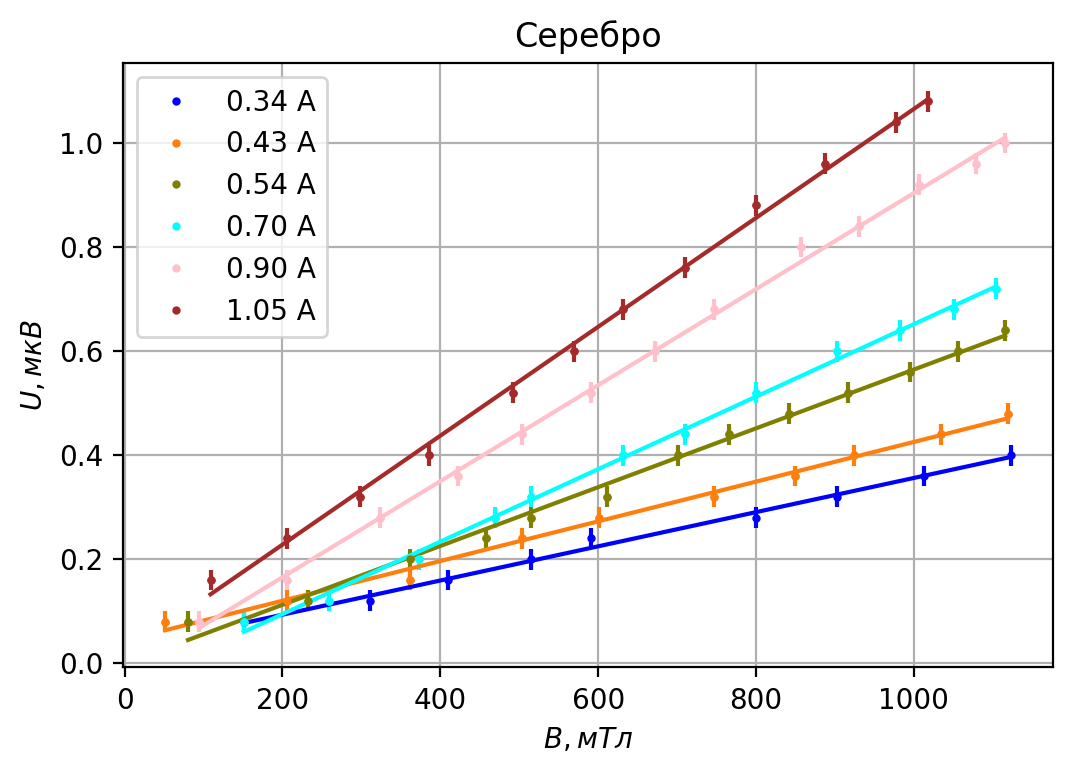

In [25]:
k = np.array([1, 1, 1, 1, 1, 1], dtype=np.float64)
delta_k = np.array([1, 1, 1, 1, 1, 1], dtype=np.float64)

U = np.array([ 3, 4, 5, 6, 7, 8], dtype=np.float64)
U -= 1
U *= 3 / 75
I = np.array([ 0.11, 0.2, 0.35, 0.87, 1.13, 1.25], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
#plt.plot(I, U, 'o', label='0.22 A')
plt.grid()

U = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
U -= 0
U *= 3 / 75
I = np.array([0.13, 0.25, 0.33, 0.42, 0.49, 0.71, 0.84, 1.01, 1.25], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o',markersize=0, color='blue')
plt.plot(I, U, 'o', label='0.34 A', markersize=2, color='blue')
popt, pcov = curve_fit(line, I, U)
#print(popt, pcov)
plt.plot(I, line(I, *popt), color='blue')
k[0] = popt[0]
delta_k[0] = np.sqrt(pcov[0][0])

U = np.array([2, 3, 4, 6, 7, 8, 9, 10, 11, 12], dtype=np.float64)
U -= 0
U *= 3 / 75
I = np.array([0.06, 0.17, 0.29, 0.41, 0.5, 0.65, 0.77, 0.87, 1.05, 1.24], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='tab:orange')
plt.plot(I, U, 'o', label='0.43 A', markersize=2, color='tab:orange')
popt, pcov = curve_fit(line, I, U, sigma=U/U*0.02, absolute_sigma=True)
plt.plot(I, line(I, *popt), color='tab:orange')
#print(popt, pcov)
k[1] = popt[0]
delta_k[1] = np.sqrt(pcov[0][0])

U = np.array([2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16], dtype=np.float64)
U -= 0
U *= 3 / 75
I = np.array([0.08, 0.19, 0.29, 0.37, 0.42, 0.51, 0.60, 0.67, 0.76, 0.86, 0.98, 1.09, 1.23], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='olive')
plt.plot(I, U, 'o', label='0.54 A', markersize=2, color='olive')
popt, pcov = curve_fit(line, I, U)
plt.plot(I, line(I, *popt), color='olive')
#print(popt, pcov)
k[2] = popt[0]
delta_k[2] = np.sqrt(pcov[0][0])

U = np.array([4, 5, 7, 9, 10, 12, 13, 15, 17, 18, 19, 20], dtype=np.float64)
U -= 2
U *= 3 / 75
I = np.array([0.13, 0.21, 0.30, 0.38, 0.42, 0.53, 0.61, 0.71, 0.84, 0.96, 1.08, 1.20], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='cyan')
plt.plot(I, U, 'o', label='0.70 A', markersize=2, color='cyan')
popt, pcov = curve_fit(line, I, U)
plt.plot(I, line(I, *popt), color='cyan')
#print(popt, pcov)
k[3] = popt[0]
delta_k[3] = np.sqrt(pcov[0][0])

U = np.array([4, 6, 9, 11, 13, 15, 17, 19, 22, 23, 25, 26, 27], dtype=np.float64)
U -= 2
U *= 3 / 75
I = np.array([0.09, 0.17, 0.26, 0.34, 0.41, 0.49, 0.57, 0.65, 0.78, 0.88, 1.00, 1.14, 1.23], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='pink')
plt.plot(I, U, 'o', label='0.90 A', markersize=2, color='pink')
popt, pcov = curve_fit(line, I, U)
plt.plot(I, line(I, *popt), color='pink')
k[4] = popt[0]
delta_k[4] = np.sqrt(pcov[0][0])


U = np.array([6, 8, 10, 12, 15, 17, 19, 21, 24, 26, 28, 29], dtype=np.float64)
U -= 2
U *= 3 / 75
I = np.array([0.10, 0.17, 0.24, 0.31, 0.40, 0.47, 0.53, 0.61, 0.71, 0.82, 0.95, 1.02], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='brown')
plt.plot(I, U, 'o', label='1.05 A', markersize=2, color='brown')
popt, pcov = curve_fit(line, I, U)
plt.plot(I, line(I, *popt), color='brown')
k[5] = popt[0]
delta_k[5] = np.sqrt(pcov[0][0])


#U = np.array([3, 6, 7, 9, 12, 14, 16, 19, 23, 25, 26, 28, 30], dtype=np.float64)
#U -= 0
#U *= 3 / 75
#I = np.array([0.08, 0.15, 0.21, 0.29, 0.37, 0.43, 0.51, 0.61, 0.76, 0.88, 0.97, 1.08, 1.23], dtype=np.float64)
#I *= popt[0] # the result is mTesla
#plt.plot(I, U, 'o', label='1.11 A')

plt.xlabel(r'$B, мТл$')
plt.ylabel(r'$U, мкВ$')
plt.title('Серебро')
plt.legend()

plt.savefig('6plots.png')

Rx = 9.362353074218899e-05 +_ 1.852969218141008e-06
n_ag 6.675672184603481e+28


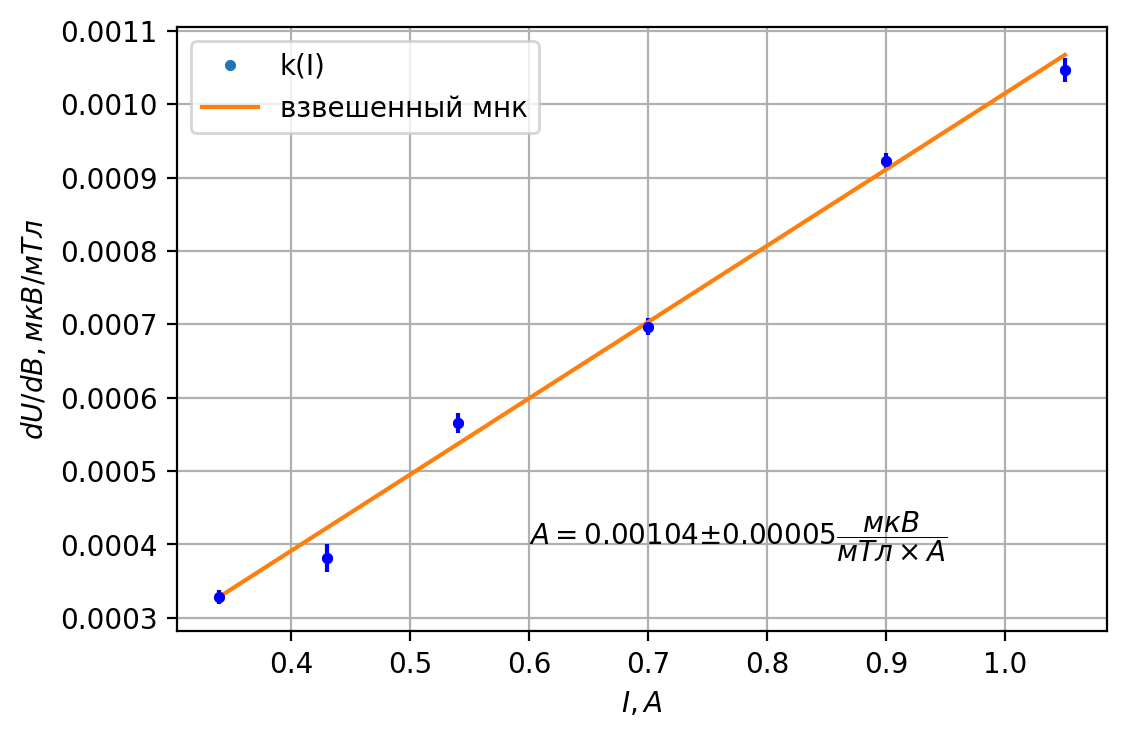

In [26]:
I_result = np.array([0.34, 0.43, 0.54, 0.70, 0.90, 1.05], dtype=np.float64)
plt.errorbar(I_result, k, xerr=0, yerr=delta_k, color='blue', fmt='o', markersize=3)
plt.plot(I_result, k, 'o', markersize=3, label='k(I)')
plt.xlabel(r'$I, А$')
plt.ylabel(r'$dU/dB, мкВ/мТл$')
plt.grid()
popt, pcov = curve_fit(line, I_result, k, sigma=delta_k, absolute_sigma=True)
plt.plot(I_result, line(I_result, *popt), label='взвешенный мнк')
plt.legend()
plt.text(0.6, 0.0004, r'$A = $' + str(int(popt[0]*1e5)/1e5) + r'$\pm 0.00005 \dfrac{мкВ}{мТл\times A}$')
print('Rx =', 0.09 * popt[0], '+_', 0.09 * np.sqrt(pcov[0][0]))
plt.savefig('k(I).png')
print('n_ag', 1 / (0.09 * popt[0]) / (1.6 * 1e-19) * 1e6)
n_ag =  1 / (0.09 * popt[0]) / (1.6 * 1e-19) * 1e6

Rx_zink = 0.00014146232963409034 +_ 2.299052257795928e-06
n_zink 4.41813733462922e+28


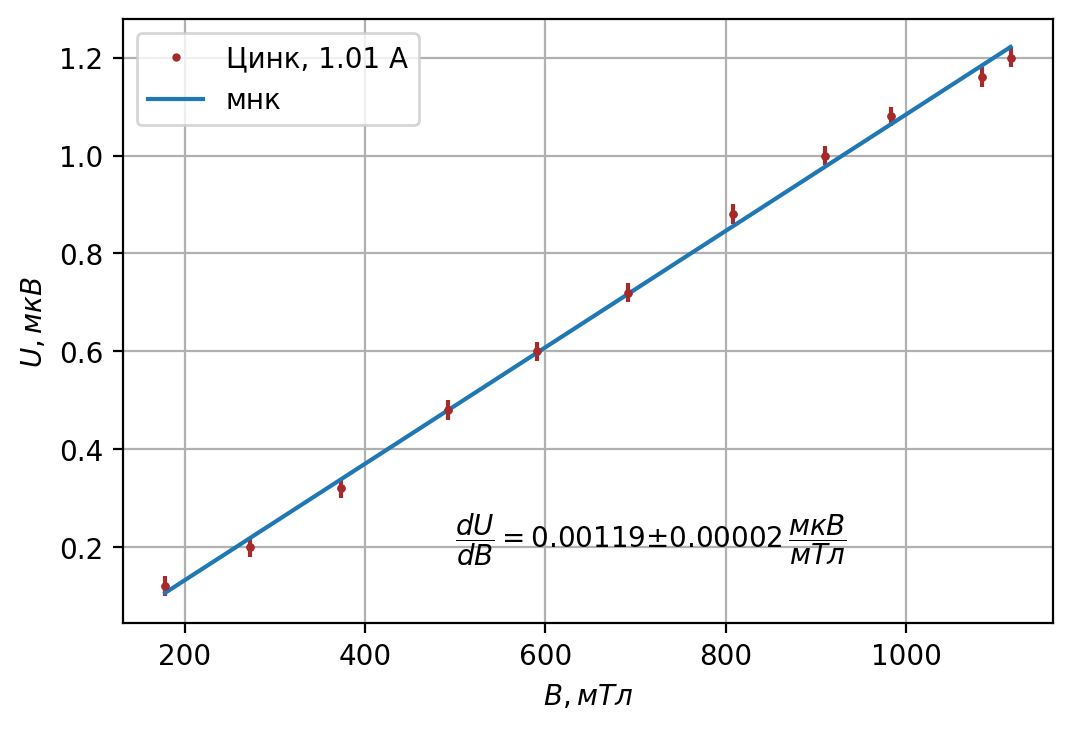

In [27]:
#Цинк


U = np.array([24, 26, 29, 33, 36, 39, 43, 46, 48, 50, 51], dtype=np.float64)
U -= 21
U *= 3 / 75
I = np.array([0.15, 0.22, 0.30, 0.40, 0.49, 0.59, 0.72, 0.85, 0.96, 1.15, 1.23], dtype=np.float64)
I = poly(I, *poly_opt) # the result is mTesla
plt.errorbar(I, U, xerr=0, yerr=0.02, fmt='o', markersize=2, color='brown')
plt.plot(I, U, 'o', label='Цинк, 1.01 A', markersize=2, color='brown')
popt, pcov = curve_fit(line, I, U, absolute_sigma=True, sigma=0.02*U/U)
plt.plot(I, line(I, *popt), label='мнк')

plt.text(500, 0.2, r'$\dfrac{dU}{dB} = $'+str(int(popt[0]*1e5)/1e5)+r'$\pm 0.00002\, \dfrac{мкВ}{мТл}$')

plt.xlabel(r'$B, мТл$')
plt.ylabel(r'$U, мкВ$')
plt.grid()
plt.legend()

print('Rx_zink =', 0.12 * popt[0]/1.01, '+_', 0.12/1.01 * np.sqrt(pcov[0][0]))
print('n_zink', 1 / (0.12 * popt[0]/1.01) / (1.6 * 1e-19) * 1e6)
n_zink = 1 / (0.12 * popt[0]/1.01) / (1.6 * 1e-19) * 1e6
plt.savefig('zink.png')

In [12]:
koefff = 1.05 * 3.5 / (0.12 * 10.5) * 1000
koefff /= 200
koefff *= 1e6
print('Цинк', koefff / 1e7, '10^7')
b_ag = koefff / (n_ag * 1.6 * 1e-19)
print('b_ag', b_ag)

koefff = 0.96 * 3.5 / (0.12 * 10.5) * 1000
koefff /= 40
koefff *= 1e6
print('Серебро', koefff / 1e7, '10^7')


Цинк 1.4583333333333335 10^7
b_ag 0.001365343156656923
Серебро 6.666666666666666 10^7
